### while solving the problems the question arise which models we have to use 

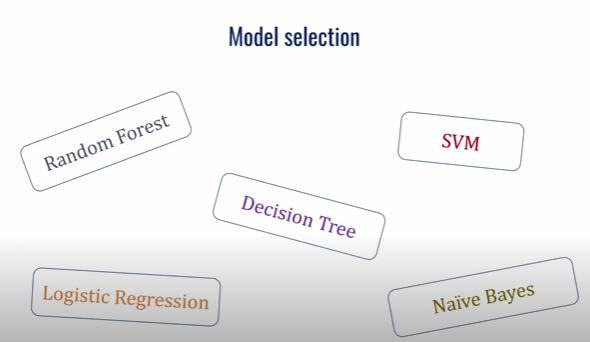

### Let us say somehow we selcted the mdoel
### Now another problem arises what kind of parameter should we use 

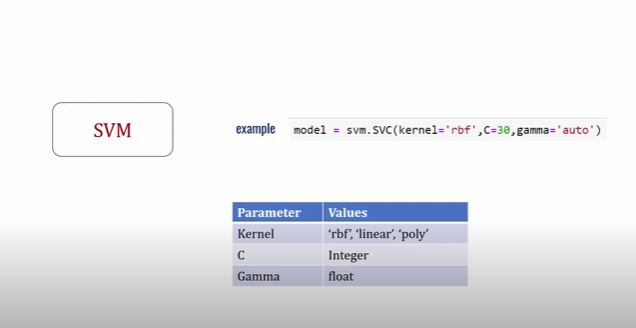

**The process of choosing optimal parameter is called as hyperparameter tunning**

In [1]:
from sklearn import svm, datasets

In [2]:
iris = datasets.load_iris()

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
df['flower'] = iris.target

In [6]:
df['flower'] = df['flower']. apply(lambda x: iris.target_names[x])
df[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [9]:
## Let's first try SVM Model

In [10]:
model = svm.SVC(kernel='rbf', C=30, gamma='auto')

In [11]:
model.fit(X_train,y_train)

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
model.score(X_test, y_test)

0.9777777777777777

In [13]:
## Here we randomly initialize the parameter we don't know which is the best parameter

In [14]:
## The issue here is based on train and test score may value


In [15]:
## If we execute again the score may varry

In [16]:
##we will use here k=fold cross validation

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
cross_val_score(svm.SVC(kernel='linear', C=10, gamma='auto'), iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [19]:
cross_val_score(svm.SVC(kernel='rbf', C=10, gamma='auto'), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [20]:
cross_val_score(svm.SVC(kernel='rbf', C=20, gamma='auto'), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [21]:
## We can not do this everytime

In [24]:
import numpy as np
kernels  = ['rbf', 'linear']
C = [1,10,20]
avg_score = {}
for kval in kernels:
    for cval in C:
        cv_score = cross_val_score(svm.SVC(kernel=kval, C=cval, gamma='auto'), iris.data, iris.target, cv=5)
        avg_score[kval + '_' + str(cval)] = np.average(cv_score)
avg_score

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

In [25]:
## But above thing have on eproblem that if we have 4 parameter then it will take more iteration

In [26]:
## the excact thing provide sklearn as gridsearch

In [27]:
## So we can do above things in a single line of code

In [29]:
from sklearn.model_selection import GridSearchCV

In [37]:
clf = GridSearchCV(svm.SVC(gamma = 'auto'), {
    'C':[1,10,20],
    'kernel':['rbf', 'linear']
}, cv=5, return_train_score=False)

clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00080428, 0.00059738, 0.00099559, 0.00118928, 0.00061102,
        0.000595  ]),
 'std_fit_time': array([4.02155498e-04, 4.87793892e-04, 5.18723440e-06, 4.07233824e-04,
        8.19371621e-04, 4.85924008e-04]),
 'mean_score_time': array([0.00059428, 0.00060029, 0.00040088, 0.00059853, 0.00039902,
        0.00040135]),
 'std_score_time': array([0.00048535, 0.00049014, 0.00049097, 0.00048871, 0.0004887 ,
        0.00049156]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [38]:
# WE can export these value into dataframe

In [40]:
df = pd.DataFrame(clf.cv_results_)

In [41]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000804,0.000402,0.000594,0.000485,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000597,0.000488,0.000600,0.000490,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000996,0.000005,0.000401,0.000491,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.001189,0.000407,0.000599,0.000489,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000611,0.000819,0.000399,0.000489,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.000595,0.000486,0.000401,0.000492,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,5


In [43]:
df[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [44]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score',
 'scorer_',
 'scoring',
 '

In [45]:
clf.best_score_

0.98

In [46]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [47]:
## One problem with the above method is it is computetionaly costif we try for large dataset it can take too much time

In [48]:
### To solve this problem there is another method called as ranomizedsearchCV

In [56]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma = 'auto'), {
     'C':[1,10,20],
    'kernel':['rbf', 'linear']
}, cv=5,
   return_train_score=False,
   n_iter =2
    
)

In [58]:
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,rbf,0.966667
1,10,linear,0.973333


In [60]:
## If we run again above code it will give result for another parameter 
## So if we have less computational power then we can use this method

In [61]:
## How to choose best model

In [63]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [64]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [65]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.953333,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


**Based on above, we can conclude that SVM with C=1 and kernel='rbf' is the best model for solving my problem of iris flower classification**